# **Exploratory Data Analysis Lab**


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

In [100]:
#Load the dataset into a dataframe.
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

In [24]:
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

In [15]:
import seaborn as sns

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


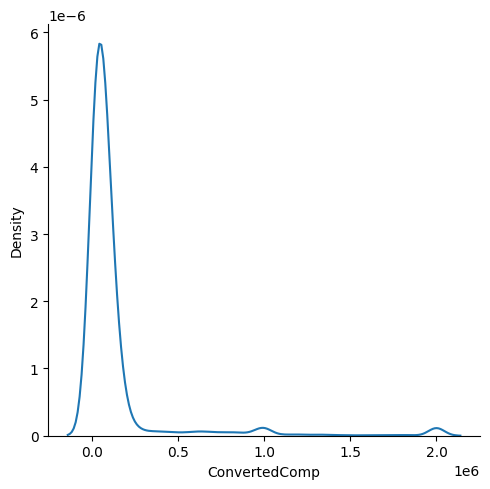

In [25]:
sns.displot(df['ConvertedComp'], kind='kde')

Plot the histogram for the column `ConvertedComp`.


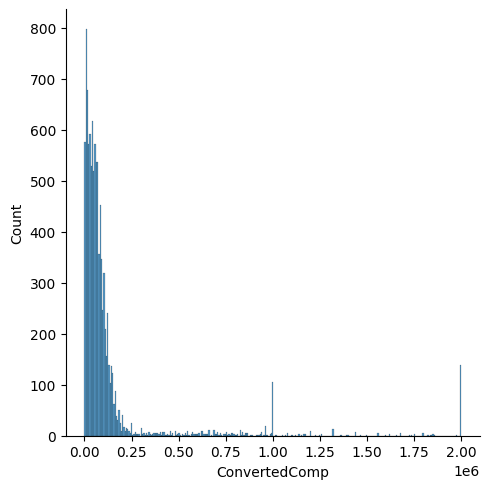

In [26]:
sns.displot(df['ConvertedComp'], kind='hist')

What is the median of the column `ConvertedComp`?


In [27]:
df['ConvertedComp'].median()

57745.0

In [54]:
df['Age'].median()

29.0

How many responders identified themselves only as a **Man**?


In [28]:
df['Gender'].value_counts()

Gender
Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: count, dtype: int64

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [45]:
df.loc[df['Gender']=="Woman", 'ConvertedComp'].median()

57708.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


<Axes: ylabel='Age'>

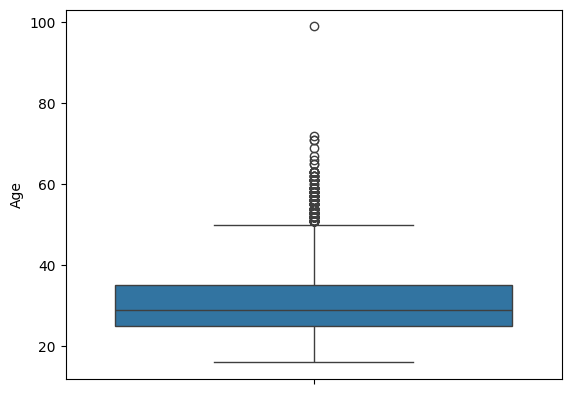

In [52]:
sns.boxplot(df['Age'])

Plot a histogram of the column `Age`.


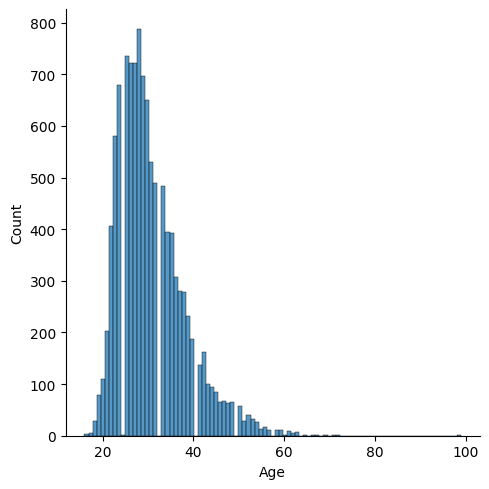

In [53]:
sns.displot(df['Age'], kind='hist')

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


<Axes: ylabel='ConvertedComp'>

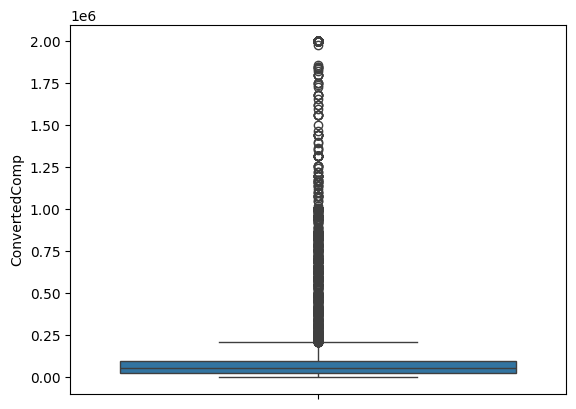

In [55]:
sns.boxplot(df['ConvertedComp'])

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [56]:
df['ConvertedComp'].describe()

count    1.058200e+04
mean     1.315967e+05
std      2.947865e+05
min      0.000000e+00
25%      2.686800e+04
50%      5.774500e+04
75%      1.000000e+05
max      2.000000e+06
Name: ConvertedComp, dtype: float64

In [83]:
df['ConvertedComp'].count()

10582

In [79]:
q1 = df['ConvertedComp'].quantile(0.25)
q3 = df['ConvertedComp'].quantile(0.75)
IQR = q3 -q1
q1, q3, IQR

(26868.0, 100000.0, 73132.0)

Find out the upper and lower bounds.


In [59]:
df['ConvertedComp'].max(), df['ConvertedComp'].min()

(2000000.0, 0.0)

Identify how many outliers are there in the `ConvertedComp` column.


In [101]:
outliers = df[(df['ConvertedComp']<(q1-1.5*IQR)) | (df['ConvertedComp']>(q3+1.5*IQR))]
outliers['ConvertedComp'].count()

879

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [105]:
df.drop(outliers.index)['ConvertedComp'].median(), df.drop(outliers.index)['ConvertedComp'].mean()

(52704.0, 59883.20838915799)

In [106]:
df_outliers_rm = df.drop(outliers.index)

In [107]:
df_outliers_rm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10519 entries, 0 to 11397
Data columns (total 85 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Respondent              10519 non-null  int64  
 1   MainBranch              10519 non-null  object 
 2   Hobbyist                10519 non-null  object 
 3   OpenSourcer             10519 non-null  object 
 4   OpenSource              10445 non-null  object 
 5   Employment              10519 non-null  object 
 6   Country                 10519 non-null  object 
 7   Student                 10469 non-null  object 
 8   EdLevel                 10411 non-null  object 
 9   UndergradMajor          9837 non-null   object 
 10  EduOther                10364 non-null  object 
 11  OrgSize                 10427 non-null  object 
 12  DevType                 10461 non-null  object 
 13  YearsCode               10510 non-null  object 
 14  Age1stCode              10509 non-null  obj

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [110]:
df.corr(numeric_only=True)

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.013490,0.002181,-0.015314,0.004621,0.004041
CompTotal,-0.013490,1.000000,0.001037,0.003510,0.007063,0.006970
ConvertedComp,0.002181,0.001037,1.000000,0.021143,-0.033865,0.105386
WorkWeekHrs,-0.015314,0.003510,0.021143,1.000000,0.026517,0.036518
CodeRevHrs,0.004621,0.007063,-0.033865,0.026517,1.000000,-0.020469
Age,0.004041,0.006970,0.105386,0.036518,-0.020469,1.000000
